# **Laboratorio N°5: Número de Condición**


In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)

In [20]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[4,5,6], [1,2,3], [7,8,9]])

A2 = np.linalg.cond(A, 2)
B2 = np.linalg.cond(B, 2)
r1 = A2 + B2
r2 = np.linalg.cond(A + B, 2)

print(r1)
print(r2)

6.264455885315651e+16
6.6946443312924504e+16


Esta propiedad es Falsa, $Cond_2(A)$ + $Cond_2(B)$ != $Cond_2(A+B)$

**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [29]:
#La matriz de resultado tiene que ser inversible, por lo que no es posible calcular el numero de condicion con este contrajemplo (una fila se me anula), por ello, cambio B
Amal = np.array([[1,2,3], [4,5,6], [7,8,9]])
Bmal = np.array([[4,5,6], [1,2,3], [7,8,9]])

A1mal = np.linalg.cond(Amal, 1)
B1mal = np.linalg.cond(Bmal, 1)
r1mal = A1mal - B1mal
r2mal = np.linalg.cond(Amal - Bmal, 2)

print(r1mal)
print(r2mal)
#-----------------------
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[4,5,6], [1,2,3], [2,2,5]])

A1 = np.linalg.cond(A, 1)
B1 = np.linalg.cond(B, 1)
r1 = A1 - B1
r2 = np.linalg.cond(A - B, 2)

print(r1)
print(r2)

0.0
inf
6.485183463413514e+17
7.338408343432234e+16


Esta propiedad es Falsa, 𝐶𝑜𝑛𝑑1(𝐴) - 𝐶𝑜𝑛𝑑1(𝐵) != 𝐶𝑜𝑛𝑑2(𝐴-𝐵)

**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [ ]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[4,5,6], [1,2,3], [7,8,9]])

A2 = np.linalg.cond(A, 2)
B2 = np.linalg.cond(B, 2)
r1 = A2 * B2
r2 = np.linalg.cond(A @ B, 2)

print(r1)
print(r2)

Esta propiedad es Falsa, 𝐶𝑜𝑛𝑑2(𝐴) * 𝐶𝑜𝑛𝑑2(𝐵) = 𝐶𝑜𝑛𝑑2(𝐴.𝐵)

## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [19]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_A(n):
    A = 1/n * np.eye(n, k=0) + (n**2) * np.eye(n, k= n - 1) + np.eye(n, k= -n + 1)
    return A


def matriz_H(n):
    #diagprin = []
    #for i in range (1, n+1, 1):
    #    diagprin.append(1/((2*i)-1))
    #H = np.diag(diagprin)
    
    #for i in range (2, n+1, 1):
        #diag1 = []
        #for j in range (n, n+1, 1):
        #    diag1.append(1/((2*i)-1))
       # H1 = np.diag(diag1)
       # k = i
        #np.insert(a, a.shape[0], np.array((20, 20, 20)), 0) [2]
      #  while k < 3:
      #      np.insert(H1, H1.shape[0], np.zeros(n), 0)
            #k-1
     #   H += H1
    
    #return H
    
    A = np.zeros((n,n))
    for i in range(0, n):
        for j in range (0, n):
            if (i != j):
                k = j + i
                A[i][j] = 1/(k+1)
            else:
                A[i][j]=0
    B = np.zeros(n)
    for r in range (1, n+1):
        B[r-1]= 1/((2*r)-1)
        
    H = A + np.diag(B)
    return H
    
print(matriz_H(5))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

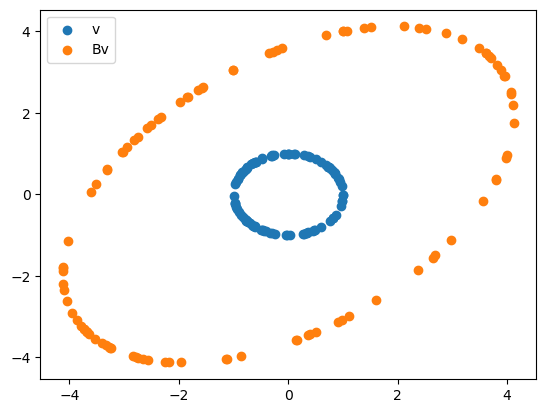

In [25]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5
V = V/np.linalg.norm(V, axis= 0) #calcula todas las normas de la matriz que le pase
BV = B @ V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()

#np.sqrt(matriz[0, :]2 + matriz[1, :]2)

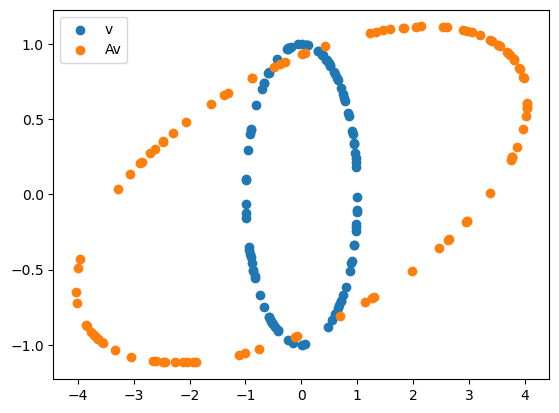

In [29]:
A = matriz_A(2)
V = np.random.rand(2, 100) - 0.5
V = V/np.linalg.norm(V, axis= 0) #calcula todas las normas de la matriz que le pase
AV = A @ V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(AV[0], AV[1], label = "Av")
plt.legend()

#np.sqrt(matriz[0, :]**2 + matriz[1, :]**2)

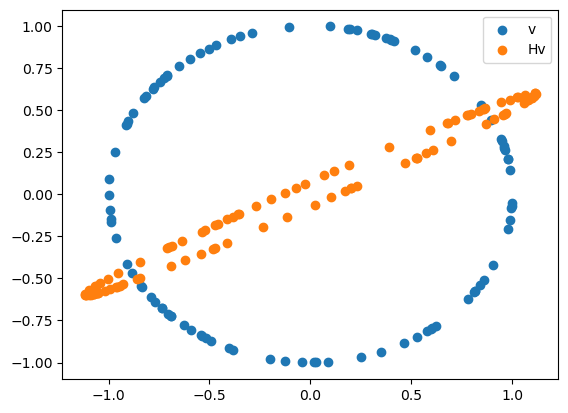

In [31]:
H = matriz_H(2)
V = np.random.rand(2, 100) - 0.5
V = V/np.linalg.norm(V, axis= 0) #calcula todas las normas de la matriz que le pase
HV = H @ V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(HV[0], HV[1], label = "Hv")
plt.legend()

#np.sqrt(matriz[0, :]**2 + matriz[1, :]**2)

**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [69]:
def vector_condicion(funcion, N):
  vector = []
  for n in range (1, N+1):
      M = funcion(n)
      val = np.linalg.cond(M)
      vector.append(val)
  return(vector)

#np.linalg.inv(A)

**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


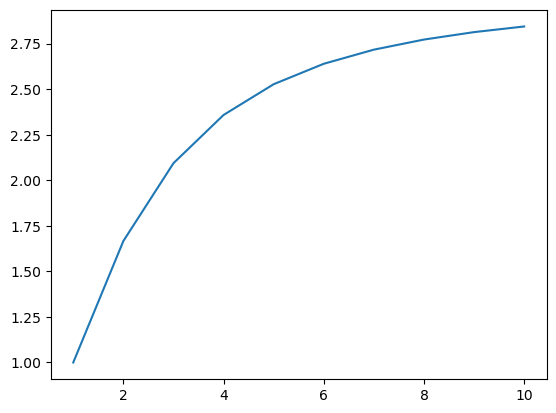

In [85]:

x= range(1,11)
y= vector_condicion(matriz_B, 10)

plt.plot(x, y)
plt.show()

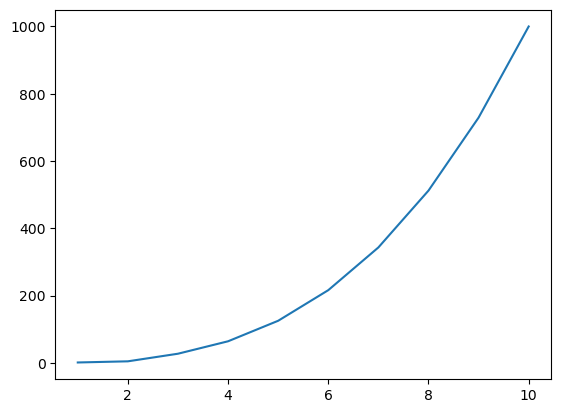

In [87]:
x= range(1,11)
y= vector_condicion(matriz_A, 10)

plt.plot(x, y)
plt.show()

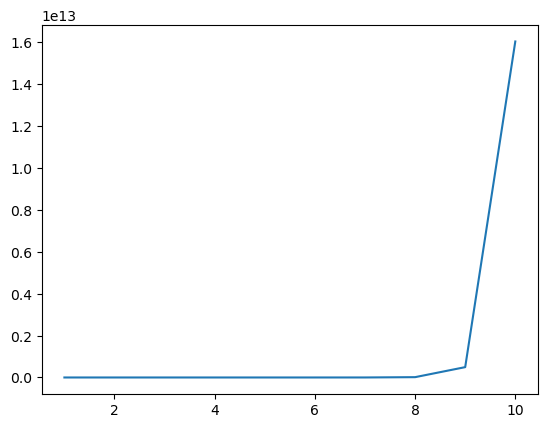

In [89]:
x= range(1,11)
y= vector_condicion(matriz_H, 10)

plt.plot(x, y)
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

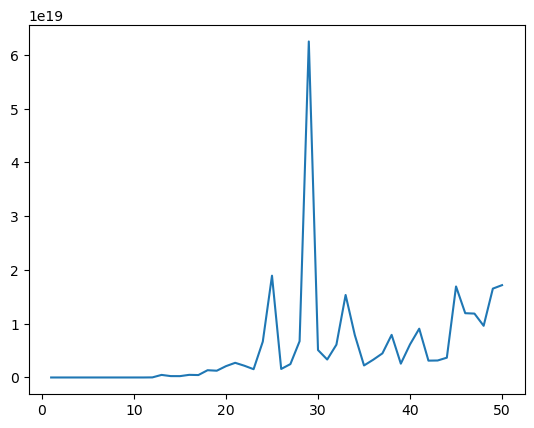

In [91]:
x= range(1,51)
y= vector_condicion(matriz_H, 50)

plt.plot(x, y)
plt.show()

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [143]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [145]:
condInf = np.linalg.cond(A, np.inf)
print(condInf)

6.0


(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [147]:
print('El error relativo de los datos debe ser ' + str((1/condInf) * (10**(-4))))

El error relativo de los datos debe ser 1.6666666666666667e-05


(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [141]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

b = np.array([[3],[2],[2]])
x = np.array([[1],[1],[1]])
deltaB = np.array([[0.0000012],[0.0000012],[-0.0000012]])
bMonio = b + deltaB

error_relativo = np.max(np.abs(b- bMonio))/np.max(np.abs(b))
print(error_relativo)
xMonio = np.linalg.solve(A, bMonio)

print(xMonio)

print(np.max(np.abs(xMonio - x)) < (10**-4))

4.0000000001150227e-07
[[1.0000004]
 [1.0000024]
 [0.9999976]]
True
